In [1]:
%matplotlib inline
%run -i setupMatplotlib.py

In [2]:
projectDir = '/Users/rik/Git/PlatoSim3'
workDir = '/Users/rik/Work/PLATO/Simulations'

%run -i setupEnvironment.py

In [3]:
import numpy as np

In [4]:
from imp import reload
import simfile
reload(simfile)
from simfile import SimFile

In [5]:
simFile = SimFile(workDir + '/Run01.hdf5')

### API of SimFile

Request image, bias and smearing maps
```
img = simFile.getImage(<Exposure Nr>)
biasMap = simFile.getBiasMap(<Exposure Nr>)
smearingMap = simFile.getSmearingMap(<Exposure Nr>)

subPixelImage = simFile.getSubPixelImage(<Exposure Nr>)
```

Request smaller imagettes around a star position
```
im = simFile.getImagette(11632, 9, radius = 3)
```

Request star information
```
starIDs, RA, dec, Vmag, xFPmm, yFPmm, rowPix, colPix = simFile.getStarCatalog()
ID, row, col, Xmm, Ymm = simFile.getStarCoordinates(<Exposure Nr> [, minVmag=<Vmag>, maxVmag=<Vmag>])
```

Request Input Parameters
```
value = simFifle.getInputParameter(<groupName>, <parameterName>)
```

Request the Flatfield maps
```
prnu = simFile.getPRNU()
irnu = simFile.getIRNU()
```

Request the PSF
```
psf = simFile.getPsf("rebinnedPSFimage")
```

Request Platform information
```
RA, dec = simFile.getPlatformPointingCoordinates()
yaw, pitch, roll = simFile.getYawPitchRoll()
```

Reloading the HDF5 file
```
simFile.reload()
```

In [6]:
img0 = simFile.getImage(0)

In [7]:
bm0 = simFile.getBiasMap(0)
sm0 = simFile.getSmearingMap(0)

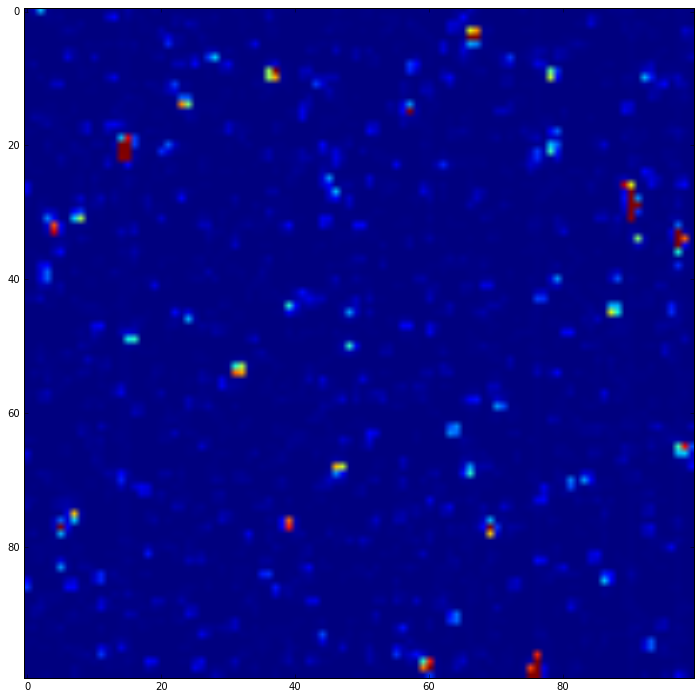

In [8]:
plt.imshow(img0)

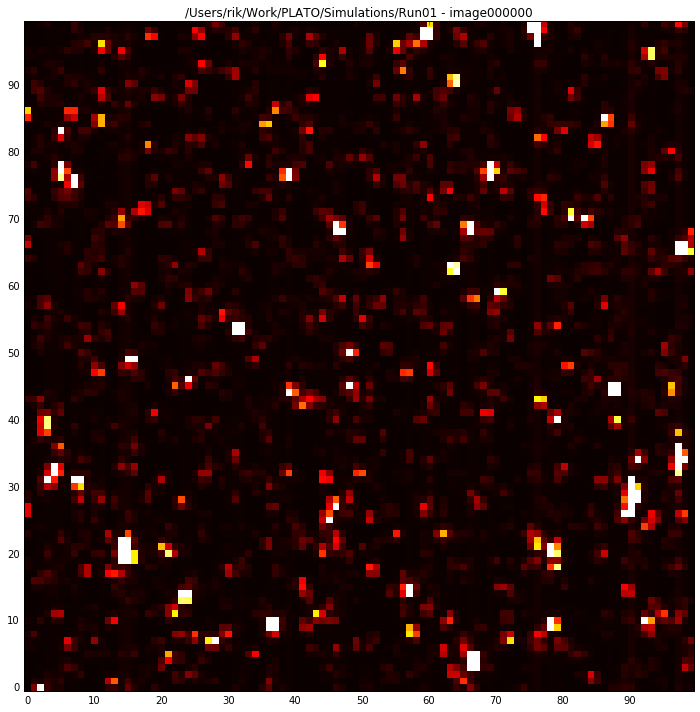

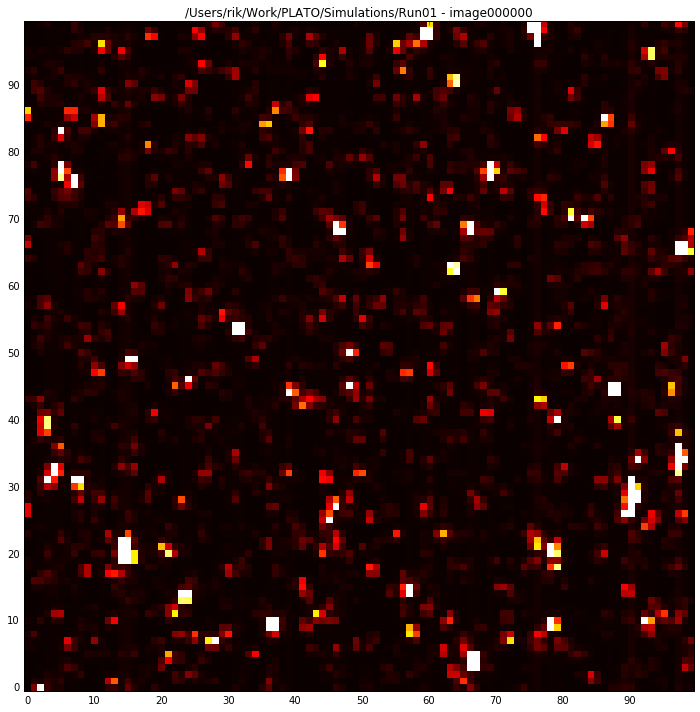

In [9]:
simFile.showImage(0)

In [10]:
subPixelImage = simFile.getSubPixelImage(9)

Error: SimFile.getSubPixelImage(): there is no SubPixelImages group in the HDF5 file


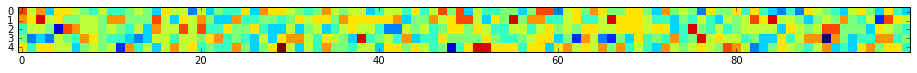

In [11]:
plt.imshow(bm0, interpolation='nearest')

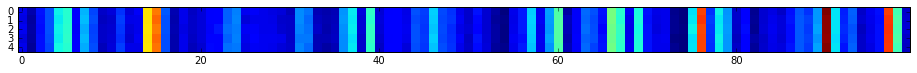

In [12]:
plt.imshow(sm0, interpolation='nearest')

In [13]:
imagette = simFile.getImagette(11632, 9, radius = 3)

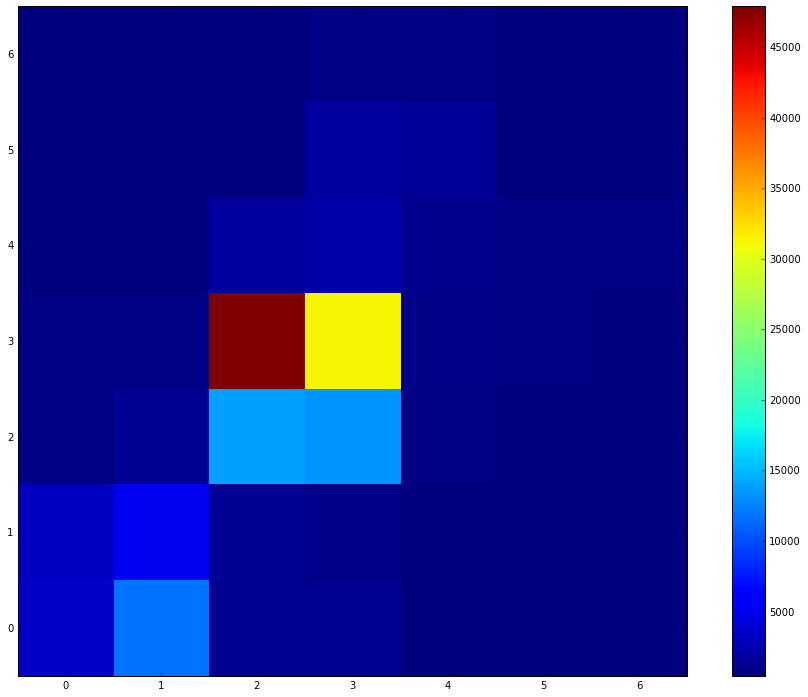

In [14]:
plt.imshow(imagette, interpolation='nearest', origin='lower')
plt.colorbar()

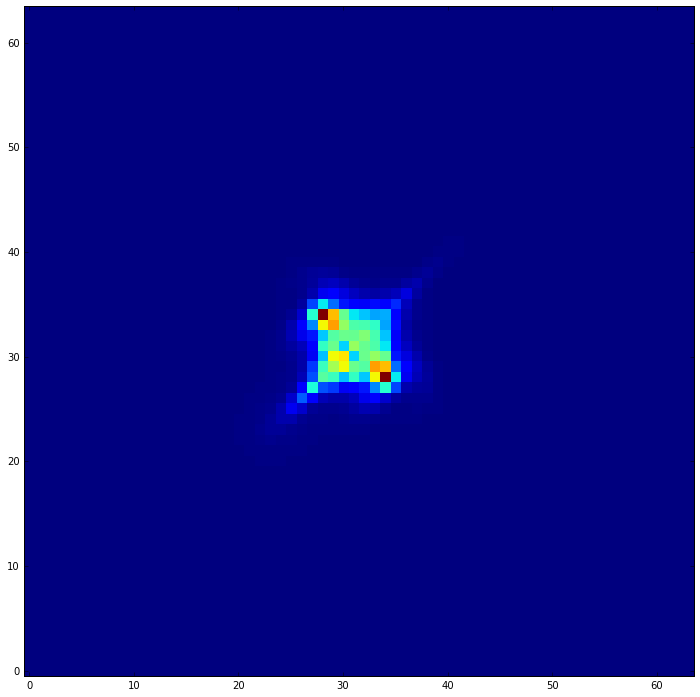

In [15]:
psf = simFile.getPsf("rebinnedPSFsubPixel")
plt.imshow(psf, interpolation='nearest', origin='lower')

In [16]:
starIDs, RA, dec, Vmag, xFPmm, yFPmm, rowPix, colPix = simFile.getStarCatalog()

In [17]:
"starIDs[{}] = {}".format(len(starIDs), starIDs)

'starIDs[1722] = [ 6218  6220  6227 ..., 16030 16059 16097]'

In [18]:
print("RA[{}] = {}".format(len(RA), RA))
print("Dec[{}] = {}".format(len(dec), dec))
print("Vmag[{}] = {}".format(len(Vmag), Vmag))

RA[1722] = [ 180.00322   180.008959  180.045969 ...,  180.964072  181.05327
  181.160126]
Dec[1722] = [-70.416977 -70.408478 -70.413383 ..., -69.997116 -69.998482 -69.999687]
Vmag[1722] = [ 14.574  14.808  11.767 ...,  14.283  10.632  14.224]


In [19]:
print("xFPmm[{}] = {}".format(len(xFPmm), xFPmm))
print("yFPmm[{}] = {}".format(len(yFPmm), yFPmm))

xFPmm[1722] = [  1.79631930e+00   1.75963092e+00   1.78083187e+00 ...,  -1.19232192e-03
   6.86288046e-03   1.49113302e-02]
yFPmm[1722] = [ 0.00464934  0.0129407   0.06638505 ...,  1.41983471  1.5514277
  1.70908143]


In [20]:
print("rowPix[{}] = {}".format(len(rowPix), rowPix))
print("colPix[{}] = {}".format(len(colPix), colPix))

rowPix[1722] = [  0.25829691   0.71892792   3.68805843 ...,  78.87970599  86.19042773
  94.94896817]
colPix[1722] = [  9.97955165e+01   9.77572736e+01   9.89351039e+01 ...,  -6.62401066e-02
   3.81271137e-01   8.28407232e-01]


To get the coordinates of all stars within a magnitude range [minVmag, maxVmag] in image 10.

In [21]:
starID, row, col, Xmm, Ymm = simFile.getStarCoordinates(9, minVmag=6.0, maxVmag=12.0)

In [22]:
"starID[{}] = {}".format(len(starID), starID)

'starID[186] = [ 6227  6308  6342  6358  6380  6447  6448  6460  6566  7901  7921  7924\n  7928  7930  7933  7934  7939  7947  7953  7968  7969  7970  7971  7980\n  7987  7993  7997  8007  8010  8021  8026  8039  8042  8051  8060  8076\n  8089  8100  8110  8165  8167  8174  8182  8191  8204  8217  8219  8222\n  8231  8241  8262  8271  9666  9673  9683  9687  9688  9702  9706  9708\n  9716  9719  9726  9745  9747  9750  9762  9767  9771  9789  9831  9838\n  9845  9848  9855  9869  9879  9891  9900  9906  9909  9910  9914  9925\n  9927  9950  9952  9957  9974 10033 10040 10049 10050 10052 10057 10065\n 11587 11591 11596 11601 11605 11606 11615 11632 11633 11639 11646 11655\n 11671 11683 11689 11705 11707 11710 11723 11751 11754 11764 11770 11800\n 11809 11824 11828 11855 11876 11880 11905 11909 11915 11937 11941 11953\n 11959 11962 11964 11972 11978 11997 13561 13567 13580 13588 13600 13603\n 13607 13632 13634 13636 13645 13646 13650 13655 13656 13679 13684 13703\n 13705 13710 13712 1372

In [23]:
simFile.getInputParameter("ObservingParameters", "NumExposures")

10

In [ ]:
%matplotlib qt
%run -i setupMatplotlib.py

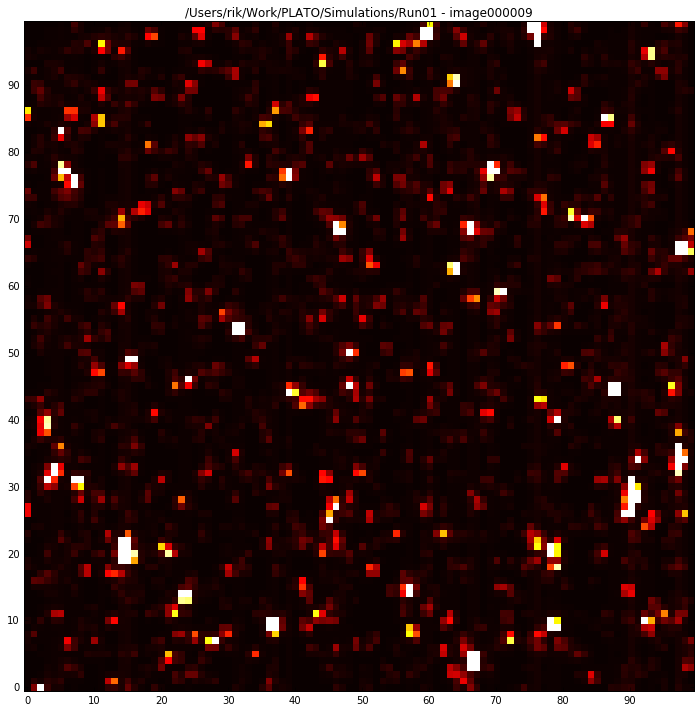

In [24]:
fig = simFile.showImage(9)
ID, row, col, Xmm, Ymm = simFile.getStarCoordinates(9)

axis = fig.axes[0]
axis.scatter(np.floor(col), np.floor(row), marker='x', c='g')

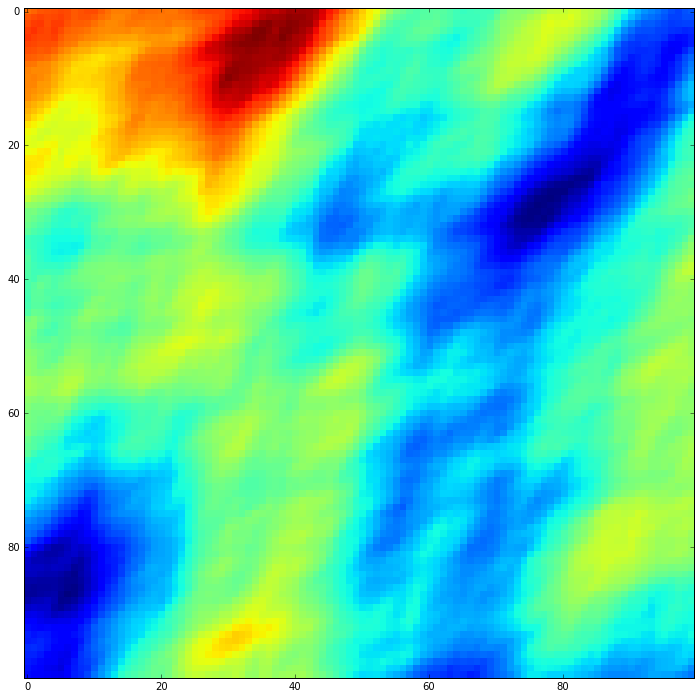

In [25]:
prnu = simFile.getPRNU()
plt.imshow(prnu, interpolation='nearest')

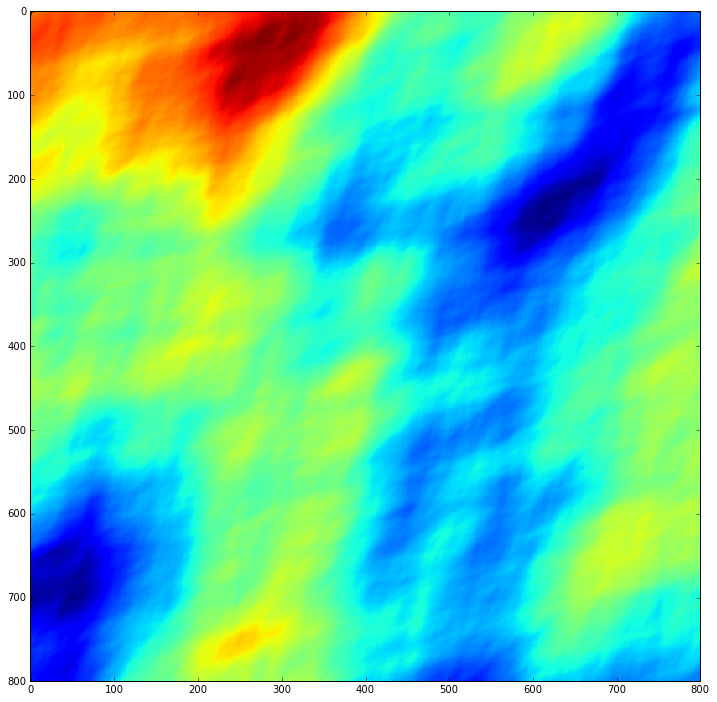

In [26]:
irnu = simFile.getIRNU()
plt.imshow(irnu, interpolation='nearest')

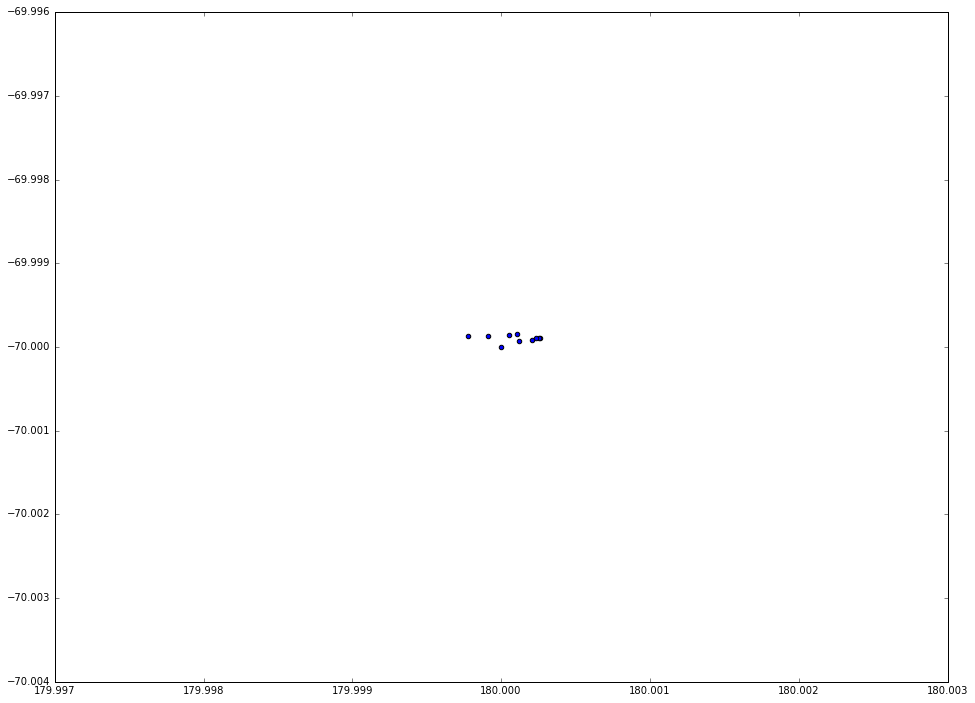

In [27]:
RA, dec = simFile.getPlatformPointingCoordinates()
plt.scatter(RA, dec)

In [28]:
yaw, pitch, roll = simFile.getYawPitchRoll()

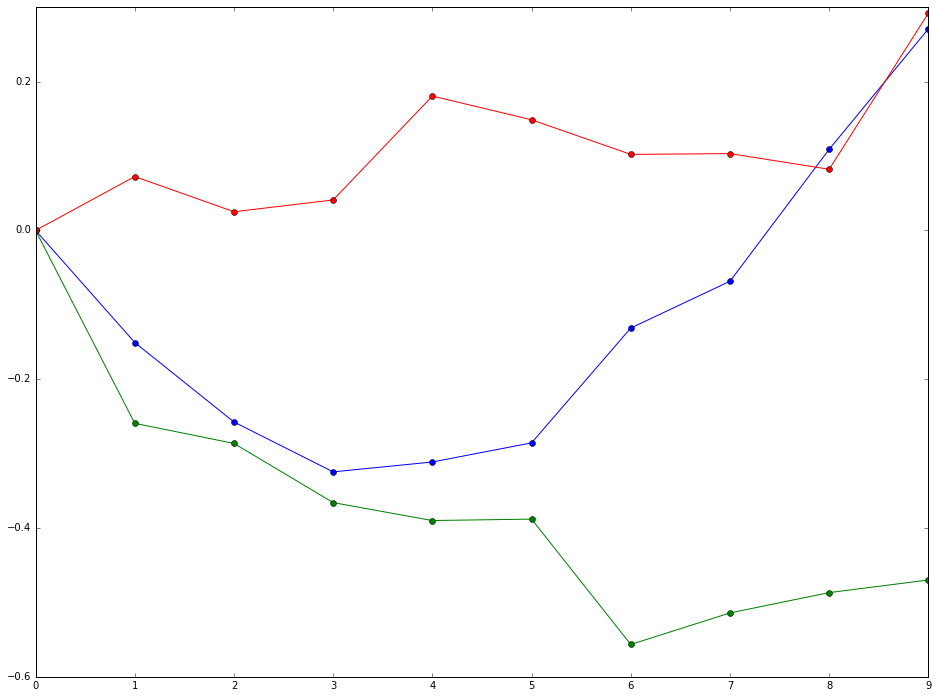

In [29]:
plt.plot(yaw, '-o')
plt.plot(pitch, '-o')
plt.plot(roll, '-o')